In [1]:
import pandas as pd
# Import numpy
import numpy as np

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
# Read in track metadata with genre labels
df = pd.read_csv('../data/songs_data.csv')

 # Inspect the resultant dataframe
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28396 entries, 0 to 28395
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          28396 non-null  object 
 1   track_name        28392 non-null  object 
 2   track_artist      28392 non-null  object 
 3   track_popularity  28396 non-null  int64  
 4   genre             28396 non-null  object 
 5   danceability      28396 non-null  float64
 6   energy            28396 non-null  float64
 7   key               28396 non-null  int64  
 8   loudness          28396 non-null  float64
 9   mode              28396 non-null  int64  
 10  speechiness       28396 non-null  float64
 11  acousticness      28396 non-null  float64
 12  instrumentalness  28396 non-null  float64
 13  liveness          28396 non-null  float64
 14  valence           28396 non-null  float64
 15  tempo             28396 non-null  float64
 16  duration_ms       28396 non-null  int64 

In [3]:
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_popularity,1.000000,0.047098,-0.103602,-0.008036,0.037750,0.016263,0.005324,0.091586,-0.124404,-0.053274,0.022792,0.003901,-0.139895
danceability,0.047098,1.000000,-0.081461,0.006925,0.015393,-0.055483,0.183176,-0.028739,-0.002592,-0.127255,0.333792,-0.184915,-0.087915
energy,-0.103602,-0.081461,1.000000,0.013084,0.682215,-0.004481,-0.028745,-0.546013,0.022918,0.163371,0.149810,0.151564,0.017810
key,-0.008036,0.006925,0.013084,1.000000,-0.000203,-0.176383,0.022746,0.004401,0.007432,0.001829,0.021763,-0.010953,0.018837
loudness,0.037750,0.015393,0.682215,-0.000203,1.000000,-0.017972,0.013156,-0.371738,-0.154991,0.081526,0.049863,0.096519,-0.104495
mode,0.016263,-0.055483,-0.004481,-0.176383,-0.017972,1.000000,-0.059651,0.006885,-0.005740,-0.000307,-0.003099,0.017061,0.012427
speechiness,0.005324,0.183176,-0.028745,0.022746,0.013156,-0.059651,1.000000,0.024509,-0.108187,0.059995,0.064879,0.032835,-0.097944
acousticness,0.091586,-0.028739,-0.546013,0.004401,-0.371738,0.006885,0.024509,1.000000,-0.001884,-0.074659,-0.019402,-0.114503,-0.094430
instrumentalness,-0.124404,-0.002592,0.022918,0.007432,-0.154991,-0.005740,-0.108187,-0.001884,1.000000,-0.008735,-0.174410,0.021225,0.058933
liveness,-0.053274,-0.127255,0.163371,0.001829,0.081526,-0.000307,0.059995,-0.074659,-0.008735,1.000000,-0.019668,0.022690,0.008551


In [4]:
# Define our features 
features = df.drop(['track_id', 'track_name', 'track_artist', 'track_popularity', 'duration_ms','genre'], axis=1)

labels = df['genre']


# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

Text(0.5, 0, 'Principal Component #')

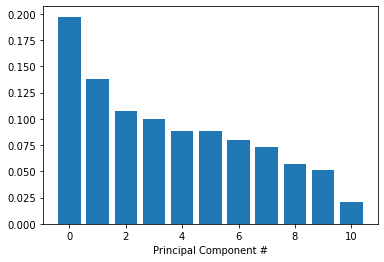

In [5]:
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

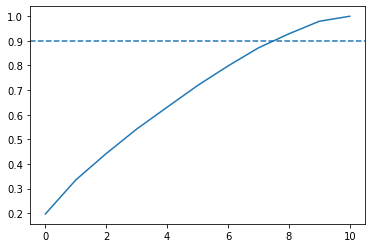

In [6]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
n_components = 6

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [7]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, 
                                                                            labels,
                                                                            random_state=10)

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)



# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)
tree.score(test_features, test_labels)

0.34849978870263415

In [8]:
# # Import XGBClassifier
# from xgboost import XGBClassifier


# # Split our data
# train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, 
#                                                                             labels,
#                                                                             random_state=10)

# # Train our decision tree
# xg = XGBClassifier(random_state=10)
# xg.fit(train_features, train_labels)



# # Predict the labels for the test data
# pred_labels_tree = xg.predict(test_features)
# xg.score(test_features, test_labels)

In [9]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)



# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)




print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

         edm       0.46      0.46      0.46      1232
       latin       0.25      0.24      0.24      1037
         pop       0.28      0.29      0.28      1296
         r&b       0.30      0.32      0.31      1113
         rap       0.41      0.40      0.40      1348
        rock       0.37      0.36      0.37      1073

    accuracy                           0.35      7099
   macro avg       0.35      0.35      0.35      7099
weighted avg       0.35      0.35      0.35      7099

Logistic Regression: 
               precision    recall  f1-score   support

         edm       0.49      0.52      0.51      1232
       latin       0.35      0.24      0.28      1037
         pop       0.28      0.27      0.27      1296
         r&b       0.36      0.33      0.34      1113
         rap       0.51      0.60      0.55      1348
        rock       0.36      0.42      0.39      1073

    accuracy                         

In [23]:
latin_only = df[df['genre']=='latin']
latin_only.shape

(4142, 17)

In [24]:
edm_only = df[df['genre']=='edm']
edm_only.shape

(4878, 17)

In [25]:
pop_only = df[df['genre']=='pop']
pop_only.shape

(5143, 17)

In [26]:
randb_only = df[df['genre']=='r&b']
randb_only.shape

(4509, 17)

In [27]:
rap_only = df[df['genre']=='rap']
rap_only.shape

(5412, 17)

In [28]:
rock_only = df[df['genre']=='rock']
rock_only.shape

(4312, 17)

In [16]:
edm_only = rock_only.sample(len(rock_only), random_state=10)
edm_only

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
27975,24pgFEZBuCv40IQKO3RKkR,Banzai - Live,Miguel Rios,0,rock,0.250,0.947,10,-7.933,0,0.0959,0.013900,0.000034,0.9750,0.439,183.891,291333
2883,1hHuyqVCZCbhYQixEkdQCo,Sing for Absolution,Muse,56,rock,0.436,0.678,5,-7.211,1,0.0301,0.457000,0.038400,0.0873,0.194,170.287,294867
21357,24IdPCimVnJJDRuB5YSDiS,I Don't Care Anymore - 2016 Remaster,Phil Collins,57,rock,0.703,0.422,11,-8.297,1,0.0378,0.188000,0.003110,0.0851,0.442,140.494,305707
9677,4wUAQIiwXE4i1jPFWvz9zf,I Can't Be With You,The Cranberries,51,rock,0.477,0.744,10,-10.394,1,0.0327,0.070400,0.000009,0.1250,0.667,130.560,187827
4156,0ZEhlT9v8CdOKu55zhYGv9,Don't Cry (Original),Guns N' Roses,15,rock,0.437,0.572,8,-8.648,0,0.0339,0.001910,0.002430,0.1160,0.239,124.172,284800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13145,2kkvB3RNRzwjFdGhaUA0tz,Layla - 40th Anniversary Version / 2010 Remast...,Derek & The Dominos,74,rock,0.404,0.903,1,-3.880,1,0.0668,0.577000,0.297000,0.2870,0.498,115.672,423840
7871,0Jci9dBlCSDgL5ivMMSAQx,Have You Ever Seen The Rain?,Creedence Clearwater Revival,3,rock,0.741,0.697,0,-7.028,1,0.0277,0.066400,0.000023,0.1330,0.774,116.109,160133
22558,4TF7GGsPSvuFEZujlrouSb,Lights Out - 2008 Remastered Version,UFO,0,rock,0.303,0.919,11,-6.071,0,0.1190,0.000003,0.731000,0.3320,0.538,153.821,275227
8806,32kgOw8wejH7zUhtXCM8DH,More Than a Feeling,Boston,19,rock,0.377,0.682,7,-8.039,1,0.0299,0.000894,0.002170,0.0504,0.288,108.736,285133


In [17]:
edm_only = df[df['genre']=='edm']
edm_only = edm_only.sample(n = 5, random_state=10)
edm_only

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20136,0JMok6kVfl3Cfy2kuz3Mg6,I Am the Best (내가 제일 잘 나가),2NE1,2,edm,0.821,0.847,0,-3.721,1,0.0387,0.00772,0.00320,0.0482,0.712,127.986,210733
10206,7mcI6Gpufrz5PF94xUVDeC,First Time - R3hab Remix,Kygo,46,edm,0.518,0.647,0,-7.198,0,0.1780,0.05490,0.00000,0.1170,0.305,176.453,155280
6162,1IBKePjbIXAkXiSvT2E4LQ,Need You,FTampa,13,edm,0.636,0.833,8,-4.504,0,0.0452,0.62500,0.00660,0.1400,0.817,127.991,212509
19640,1liwCzSX7DqdmqS4nJBl5R,Chunky - Club Mix,Format:B,47,edm,0.808,0.916,10,-4.540,1,0.0635,0.00431,0.59800,0.0445,0.685,121.990,362282
9255,70yPGzbTX6vrNtMJlHXJuL,Arabian Bounce,Wolfpack,41,edm,0.689,0.962,2,-2.952,1,0.0850,0.00707,0.00127,0.2360,0.107,128.010,236304


In [18]:
# Subset only the hip-hop tracks, and then only the rock tracks
edm_only = df[df['genre']=='edm']
latin_only = df[df['genre']=='latin']
pop_only = df[df['genre']=='pop']
randb_only = df[df['genre']=='r&b']
rap_only = df[df['genre']=='rap']
rock_only = df[df['genre']=='Rock']


# sample the rocks songs to be the same number as there are hip-hop songs
edm_only = edm_only.sample(n = 4312, random_state=10, replace=True)
pop_only = pop_only.sample(n = 4312, random_state=10, replace=True)
randb_only = randb_only.sample(n = 4312, random_state=10, replace=True)
rap_only = rap_only.sample(n = 4312, random_state=10, replace=True)
latin_only = latin_only.sample(n = 4312, random_state=10, replace=True)

# concatenate the dataframes rock_only and hop_only
all_list = [edm_only, pop_only, latin_only, randb_only, rap_only, rock_only]
all_df = pd.concat(all_list)

# The features, labels, and pca projection are created for the balanced dataframe
features = all_df.drop(['genre', 'track_id', 'track_name','track_artist'], axis=1) 
labels = all_df['genre']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

In [19]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

         edm       0.72      0.71      0.72      1095
       latin       0.63      0.66      0.65      1069
         pop       0.63      0.61      0.62      1056
         r&b       0.63      0.67      0.65      1063
         rap       0.66      0.63      0.64      1107

    accuracy                           0.66      5390
   macro avg       0.66      0.66      0.66      5390
weighted avg       0.66      0.66      0.66      5390

Logistic Regression: 
               precision    recall  f1-score   support

         edm       0.50      0.58      0.54      1095
       latin       0.36      0.34      0.35      1069
         pop       0.35      0.37      0.36      1056
         r&b       0.41      0.40      0.40      1063
         rap       0.45      0.40      0.42      1107

    accuracy                           0.42      5390
   macro avg       0.41      0.42      0.41      5390
weighted avg       0.42      0.42    

In [22]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(10, random_state=None)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree, pca_projection, labels, cv=kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", tree_score, "Logistic Regression:", logit_score)

Decision Tree: [0.61456401 0.58302412 0.48191095 0.46428571 0.5255102  0.52922078
 0.52087199 0.51994434 0.50185529 0.50742115] Logistic Regression: [0.3919295  0.39517625 0.06539889 0.07142857 0.01252319 0.02040816
 0.10853432 0.09508349 0.15723562 0.15445269]


In [36]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# # STEP 6 - Performance evaluation
# # Generating predictions
# y_pred_dt = DecisionTreeClassifier.predict(test_features, )
# y_pred_dt
